<a href="https://colab.research.google.com/github/Amitmalhotra0303/ObjectDetection/blob/main/Rice_grain_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import re
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import random
random.seed(0)
import os
from sklearn.model_selection import train_test_split
from keras import backend as k
from tensorflow.keras.layers import Activation, InputLayer, Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import zipfile
zip_file_path = '/content/Case study1_Dataset.zip'
extracted_dir_path = '/content/'
os.makedirs(extracted_dir_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# New section

In [9]:
x = []
y = []
for i in os.listdir('/content/dataset'):

  if i != '.DS_Store':
    print(i)

    for j in os.listdir(os.path.join('/content/dataset', i)):

      image = cv2.imread(os.path.join('/content/dataset', i, j))
      image = cv2.resize(image, (128, 128))
      x.append(image)
      y.append(i)

Basmati
Ipsala
Arborio
Karacadag
Jasmine


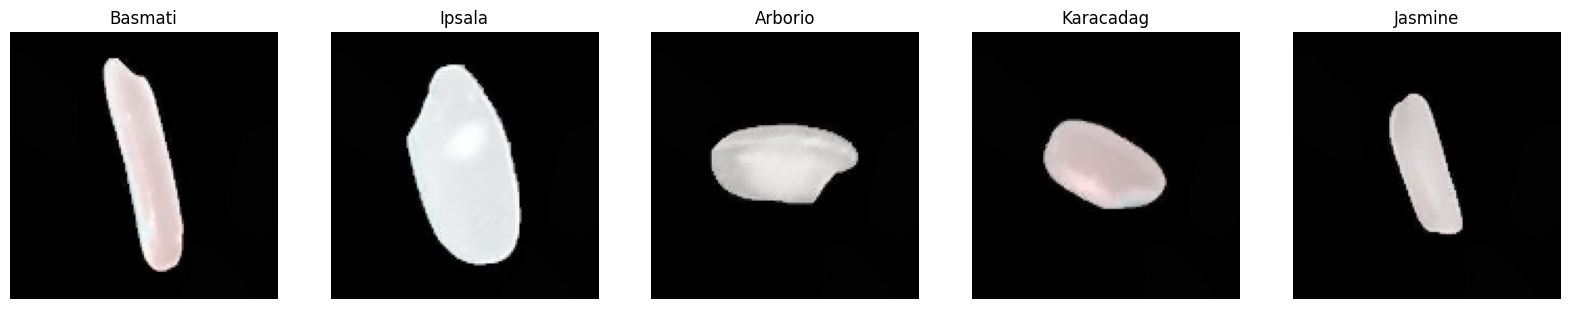

In [10]:
n = [1, 2500, 4500, 6500, 8500]
plt.figure(figsize=(20,20))

for i, j in enumerate(n):

  plt.subplot(1, len(n), i+1)
  plt.imshow(x[j], cmap='gray')
  plt.title("{}".format(y[j]))
  plt.axis('off')

plt.show()

In [13]:
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(10020, 128, 128, 3)
(10020,)


In [15]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.05, random_state = 42, stratify = y)

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 0.2, random_state = 42, stratify = y_train_val)

In [17]:
x_train.shape

(7615, 128, 128, 3)

In [18]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

In [21]:
y_train_onehot = pd.get_dummies(y_train)
y_val_onehot = pd.get_dummies(y_val)
y_test_onehot = pd.get_dummies(y_test)

print(y_train_onehot.shape)

(7615, 5)


In [22]:
y_train_onehot

,Arborio,Basmati,Ipsala,Jasmine,Karacadag
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
7610,1,0,0,0,0
7611,0,0,0,0,1
7612,0,1,0,0,0
7613,0,1,0,0,0


In [23]:
model = Sequential()
model.add(Convolution2D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = (128, 128, 3)))
model.add(Convolution2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(Convolution2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(Convolution2D(filters = 32, kernel_size = 3, activation = 'relu'))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [24]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dense (Dense)               (None, 64)                29491264  
                                                                 
 dense_1 (Dense)             (None, 128)               8

In [25]:
history = model.fit(x_train, y_train_onehot, batch_size = 64, epochs = 10, validation_data = (x_val, y_val_onehot))

Epoch 1/10
119/119 [==============================] - 68s 409ms/step - loss: 0.2811 - accuracy: 0.8997 - val_loss: 18.5459 - val_accuracy: 0.9617
Epoch 2/10
119/119 [==============================] - 35s 292ms/step - loss: 0.0701 - accuracy: 0.9761 - val_loss: 15.1669 - val_accuracy: 0.9732
Epoch 3/10
119/119 [==============================] - 35s 296ms/step - loss: 0.0491 - accuracy: 0.9814 - val_loss: 8.6748 - val_accuracy: 0.9811
Epoch 4/10
119/119 [==============================] - 35s 296ms/step - loss: 0.0320 - accuracy: 0.9879 - val_loss: 14.1819 - val_accuracy: 0.9821
Epoch 5/10
119/119 [==============================] - 35s 292ms/step - loss: 0.0313 - accuracy: 0.9878 - val_loss: 17.1280 - val_accuracy: 0.9806
Epoch 6/10
119/119 [==============================] - 35s 295ms/step - loss: 0.0250 - accuracy: 0.9907 - val_loss: 17.5879 - val_accuracy: 0.9806
Epoch 7/10
119/119 [==============================] - 35s 292ms/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 20.6550 - 

In [26]:
model.evaluate(x_val, y_val_onehot)

60/60 [==============================] - 6s 58ms/step - loss: 38.9081 - accuracy: 0.9685


[38.90810775756836, 0.9684873819351196]

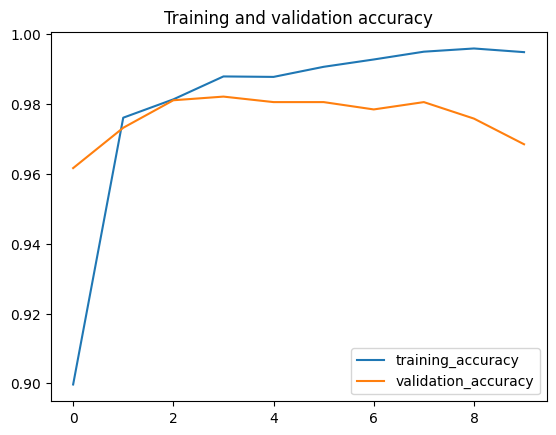

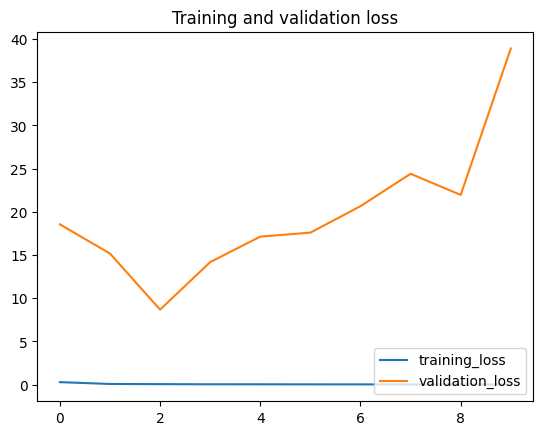

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label = 'training_accuracy')
plt.plot(epochs, val_accuracy, label = 'validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training_loss')
plt.plot(epochs, val_loss, label = 'validation_loss')
plt.title('Training and validation loss')
plt.legend(loc = 'lower right')


In [29]:
model.save('cnn_rice.h5')
model.save_weights('cnn_rice_weights.h5')

In [30]:
from tensorflow.keras.models import load_model
model_cnn = load_model('cnn_rice.h5')

1/1 [==============================] - 1s 580ms/step
predicted label Jasmine


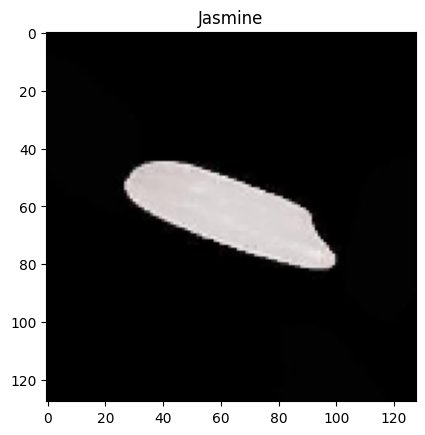

In [32]:
n = 125

plt.title(y_test[n])
plt.imshow(x_test[n])
y_pred = model_cnn.predict(x_test[n].reshape(1, 128, 128, 3))

labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

for i in y_pred:
  for j, k in enumerate(i):
    if k == y_pred.max():
      print('predicted label', labels[j])

In [35]:
model1 = Sequential()

model1.add(Convolution2D(filters = 128, kernel_size = 3, activation = "relu", input_shape = (128, 128, 3)))
model1.add(Convolution2D(filters = 128, kernel_size = 3, activation = "relu"))
model1.add(Convolution2D(filters = 64, kernel_size = 3, activation = "relu"))
model1.add(Convolution2D(filters = 32, kernel_size = 3, activation = "relu"))

model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(rate = 0.2))

model1.add(Flatten())
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(5, activation = 'softmax'))

In [36]:
model1.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = ["adam"])

In [37]:
model1.summary(

)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 64)      73792     
                                                                 
 conv2d_7 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 60, 60, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                      

In [38]:
history_new = model.fit(x_train, y_train_onehot, batch_size = 64, epochs = 5, validation_data = (x_val, y_val_onehot))

Epoch 1/5
119/119 [==============================] - 36s 302ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 33.8218 - val_accuracy: 0.9722
Epoch 2/5
119/119 [==============================] - 34s 287ms/step - loss: 0.0193 - accuracy: 0.9942 - val_loss: 38.3415 - val_accuracy: 0.9695
Epoch 3/5
119/119 [==============================] - 35s 290ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 33.1176 - val_accuracy: 0.9716
Epoch 4/5
119/119 [==============================] - 35s 298ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 23.5304 - val_accuracy: 0.9811
Epoch 5/5
119/119 [==============================] - 34s 288ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 36.3469 - val_accuracy: 0.9790


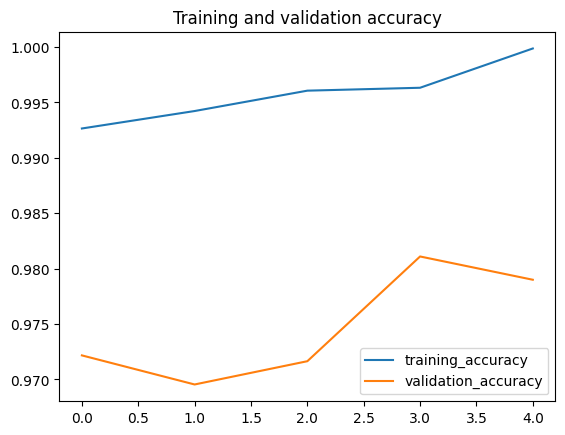

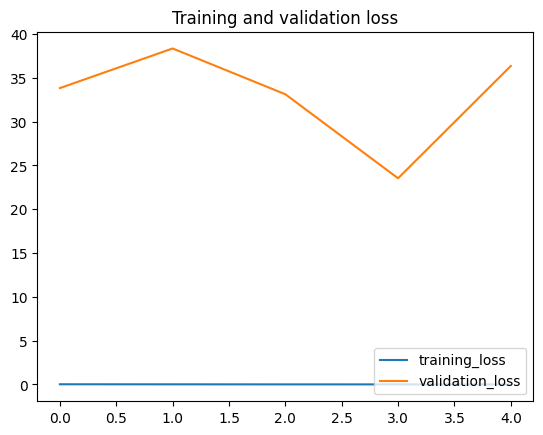

In [39]:
accuracy = history_new.history['accuracy']
val_accuracy = history_new.history['val_accuracy']
loss = history_new.history['loss']
val_loss = history_new.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label = 'training_accuracy')
plt.plot(epochs, val_accuracy, label = 'validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training_loss')
plt.plot(epochs, val_loss, label = 'validation_loss')
plt.title('Training and validation loss')
plt.legend(loc = 'lower right')


In [40]:
model.save('cnn_rice_new.h5')
model.save_weights('cnn_rice_weights_new.h5')